In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [2]:
path='C:/Users/hp/Desktop/practice projects/Corona-virus-COVID19-predictions-project-master/Corona-virus-COVID19-predictions-project-master/dataset/Infected.csv'
ds = pd.read_csv(path, index_col=0)
ds.head(13)

,num_of_date,num_of_patients,Date_test,num_of_date_test,num_of_patients_test
Date,,,,,
2020-01-21,1,1,2020-02-05,16.0,11.0
2020-01-22,2,1,2020-02-16,27.0,13.0
2020-01-23,3,1,2020-02-22,33.0,15.0
2020-01-24,4,2,2020-02-27,38.0,58.0
2020-01-25,5,2,2020-03-03,43.0,118.0
2020-01-26,6,5,2020-03-05,45.0,217.0
2020-01-27,7,5,2020-03-12,52.0,1663.0
2020-01-28,8,5,2020-03-23,63.0,43847.0
2020-01-29,9,5,2020-03-30,70.0,161807.0


In [3]:
x = ds['num_of_date']
y = ds['num_of_patients']
x_test_patient = ds['num_of_date_test'][:12]
y_test_patient = ds['num_of_patients_test'][:12]
x_prediction =[[95],[96],[97],[98],[99],[100],[101]]

## Linear regression - code n validation

In [4]:
linear_regression=LinearRegression()

yy=np.log10(y)

scores = []
######################################################################################################################
Linear_Regression = LinearRegression()
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test , yy_train, yy_test= x[train_index], x[test_index], y[train_index], y[test_index], yy[train_index], yy[test_index]
    Linear_Regression.fit(X_train.values.reshape(-1,1), yy_train)
    scores.append(Linear_Regression.score(X_test.values.reshape(-1,1), yy_test))
    
print("Average score for Linear Regression:",sum(scores)/len(scores))    


Average score for Linear Regression: 0.947731350509466


## evaluation of linear model

In [5]:
# after the validation we evaluate the Linear Model :
Linear_Regression.fit(x.values.reshape(-1,1), yy)
y_test_patient_log=np.log10(y_test_patient)
evaluation_1 =Linear_Regression.predict(x_test_patient.values.reshape(-1,1))
score=Linear_Regression.score(x_test_patient.values.reshape(-1,1), y_test_patient_log)   
print("Final Evaluation Score for Linear Regression :",score)

Final Evaluation Score for Linear Regression : 0.9303292029481324


### prediction for new days

In [6]:
print('Evaluation for expecting 6 days in future in Linear_Regression:')
for predict in x_prediction:
  print('day',predict,'=',int(10**Linear_Regression.predict([predict])))

Evaluation for expecting 6 days in future in Linear_Regression:
day [95] = 2750230
day [96] = 3242796
day [97] = 3823580
day [98] = 4508382
day [99] = 5315832
day [100] = 6267896
day [101] = 7390475


### plot

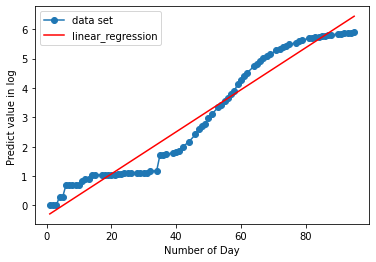

In [7]:
# here the data are displayed in logarithmic representation
predicted1 = Linear_Regression.predict(x.values.reshape(-1,1))
predicted11 = 10**Linear_Regression.predict(x.values.reshape(-1,1))
plt.plot(x, yy, 'o-',label='data set')
plt.plot(x, predicted1,c='#ff0000',label='linear_regression')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in log ')
plt.show()

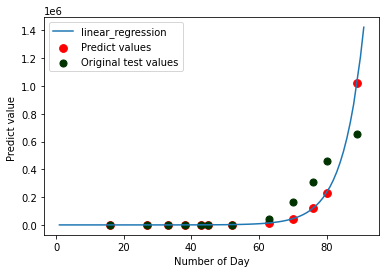

In [8]:
# Here the data is displayed by exponential representation (linear_regression Curve Was Converted)
plt.plot(x[:79], predicted11[:79],label='linear_regression')
plt.scatter(x_test_patient, 10**evaluation_1 ,s=60, c='#ff0000',label='Predict values')
plt.scatter(x_test_patient, y_test_patient ,s=50, c='#003300',label='Original test values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value ')
plt.show()

## Support Vector regression
### Code & Validation

In [9]:
scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []
######################################################################################################################
SVR_Regressor_1 = SVR(kernel='rbf')
SVR_Regressor_2 = SVR(kernel='poly',degree=5)
SVR_Regressor_3 = SVR(kernel='linear')
SVR_Regressor_4 = SVR(kernel='poly',degree=2)
SVR_Regressor_5 = SVR(kernel='poly',degree=7)
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test ,yy_train, yy_test= x[train_index], x[test_index], y[train_index], y[test_index], yy[train_index], yy[test_index]
    #
    SVR_Regressor_1.fit(X_train.values.reshape(-1,1), y_train)
    scores_1.append(SVR_Regressor_1.score(X_test.values.reshape(-1,1), y_test))
    #
    SVR_Regressor_2.fit(X_train.values.reshape(-1,1), y_train)
    scores_2.append(SVR_Regressor_2.score(X_test.values.reshape(-1,1), y_test))
    #
    SVR_Regressor_3.fit(X_train.values.reshape(-1,1), y_train)
    scores_3.append(SVR_Regressor_3.score(X_test.values.reshape(-1,1), y_test))
    #
    SVR_Regressor_4.fit(X_train.values.reshape(-1,1), y_train)
    scores_4.append(SVR_Regressor_4.score(X_test.values.reshape(-1,1), y_test))
    #
    SVR_Regressor_5.fit(X_train.values.reshape(-1,1), y_train)
    scores_5.append(SVR_Regressor_5.score(X_test.values.reshape(-1,1), y_test))

print("Average score for SVR_Regressor_1:",sum(scores_1)/10,
      "\nAverage score for SVR_Regressor_2:",sum(scores_2)/10,
      "\nAverage score for SVR_Regressor_3:",sum(scores_3)/10,
      "\nAverage score for SVR_Regressor_4:",sum(scores_4)/10,
      "\nAverage score for SVR_Regressor_5:",sum(scores_5)/10)   


Average score for SVR_Regressor_1: -0.3947486705063331 
Average score for SVR_Regressor_2: 0.9540088594110667 
Average score for SVR_Regressor_3: -0.1608372934452422 
Average score for SVR_Regressor_4: -0.387433213590172 
Average score for SVR_Regressor_5: 0.9103206959724819


### After the validation we chosed best parameter for SVR (SVR_Regressor_2) to evaluate:

### evaluation

In [10]:
SVR_Regressor_2.fit(x.values.reshape(-1,1), y)
y_test_patient_log=np.log10(y_test_patient)
evaluation_2 =SVR_Regressor_2.predict(x_test_patient.values.reshape(-1,1))
score=SVR_Regressor_2.score(x_test_patient.values.reshape(-1,1), y_test_patient)   
print("Final Evaluation Score for SVR Regression :",score)

Final Evaluation Score for SVR Regression : 0.9587420012661088


### prediction for new days

In [11]:
print('Evaluation for expecting 6 days in future in SVR_Regression:')
for predict in x_prediction:
  print('day',predict,'=',int(SVR_Regressor_2.predict([predict])))

Evaluation for expecting 6 days in future in SVR_Regression:
day [95] = 834622
day [96] = 879540
day [97] = 926369
day [98] = 975169
day [99] = 1026003
day [100] = 1078932
day [101] = 1134022


### plot - Here the data is displayed by exponential representation

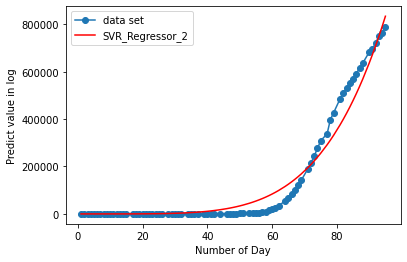

In [12]:
predicted2 = (SVR_Regressor_2.predict(x.values.reshape(-1,1)))
predicted22= np.log10(predicted2[23:])
plt.plot(x,y, 'o-',label='data set')
plt.plot(x, predicted2,c='#ff0000',label='SVR_Regressor_2')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in log')
plt.show()

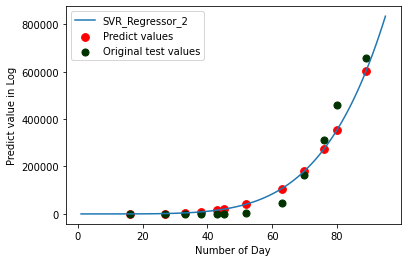

In [13]:
plt.plot(x, predicted2,label='SVR_Regressor_2')
plt.scatter(x_test_patient, evaluation_2 ,s=60, c='#ff0000',label='Predict values')
plt.scatter(x_test_patient, y_test_patient ,s=50, c='#003300',label='Original test values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

### MLPRegressor - Code & Validation

In [14]:
scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []
######################################################################################################################
MLP_Regressor_1 = MLPRegressor(hidden_layer_sizes=(4), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)
MLP_Regressor_2 = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)
MLP_Regressor_3 = MLPRegressor(hidden_layer_sizes=(1), activation='tanh', solver='lbfgs' ,learning_rate_init=0.3, max_iter=1000,random_state=120, validation_fraction=0.2)
MLP_Regressor_4 = MLPRegressor(hidden_layer_sizes=(5), activation='relu', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=1, validation_fraction=0.1)
MLP_Regressor_5 = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='sgd' ,learning_rate_init=0.01, max_iter=1000,random_state=1, validation_fraction=0.1)
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test ,yy_train, yy_test= x[train_index], x[test_index], y[train_index], y[test_index], yy[train_index], yy[test_index]
    #
    MLP_Regressor_1.fit(X_train.values.reshape(-1,1), yy_train)
    scores_1.append(MLP_Regressor_1.score(X_test.values.reshape(-1,1), yy_test))
    #
    MLP_Regressor_2.fit(X_train.values.reshape(-1,1), yy_train)
    scores_2.append(MLP_Regressor_2.score(X_test.values.reshape(-1,1), yy_test))
    #
    MLP_Regressor_3.fit(X_train.values.reshape(-1,1), yy_train)
    scores_3.append(MLP_Regressor_3.score(X_test.values.reshape(-1,1), yy_test))
     #
    MLP_Regressor_4.fit(X_train.values.reshape(-1,1), yy_train)
    scores_4.append(MLP_Regressor_4.score(X_test.values.reshape(-1,1), yy_test))
    #
    MLP_Regressor_5.fit(X_train.values.reshape(-1,1), yy_train)
    scores_5.append(MLP_Regressor_5.score(X_test.values.reshape(-1,1), yy_test))

print("Average score for MLP_Regressor_1:",sum(scores_1)/10,"\nAverage score for MLP_Regressor_2:",sum(scores_2)/10,"\nAverage score for MLP_Regressor_3:",sum(scores_3)/10
      ,"\nAverage score for MLP_Regressor_4:",sum(scores_4)/10,"\nAverage score for MLP_Regressor_5:",sum(scores_5)/10)    

Average score for MLP_Regressor_1: 0.9981947637393904 
Average score for MLP_Regressor_2: 0.9979001294973917 
Average score for MLP_Regressor_3: 0.991010176818711 
Average score for MLP_Regressor_4: -0.22137070515497576 
Average score for MLP_Regressor_5: -0.2732449480660681


### After the validation we chosed best parameter for MLP (MLP_Regressor_2) to evaluate
### evaluation

In [15]:
MLP_Regressor = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)
MLP_Regressor.fit(x.values.reshape(-1,1), yy)
y_test_patient_log=np.log10(y_test_patient)
evaluation_3 =MLP_Regressor.predict(x_test_patient.values.reshape(-1,1))
score=MLP_Regressor.score(x_test_patient.values.reshape(-1,1), y_test_patient_log)   
print("Final Evaluation Score for MLP_Regressor :",score)

Final Evaluation Score for MLP_Regressor : 0.9984959052564211


### prediction for new days

In [16]:
print('Evaluation for expecting 6 days in future in MLP_Regressor:')
for predict in x_prediction:
  print('day',predict,'=',int(10**MLP_Regressor.predict([predict])))

Evaluation for expecting 6 days in future in MLP_Regressor:
day [95] = 782556
day [96] = 802313
day [97] = 822328
day [98] = 842698
day [99] = 863512
day [100] = 884859
day [101] = 906822


### plot - Here the data is displayed by exponential

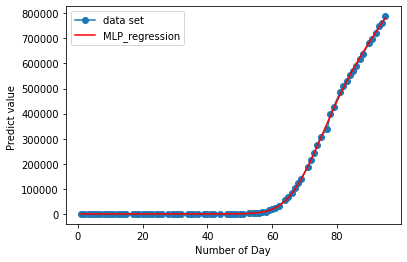

In [17]:
predicted3 =10**MLP_Regressor.predict(x.values.reshape(-1,1))
predicted33=MLP_Regressor.predict(x.values.reshape(-1,1))
plt.plot(x, y, 'o-',label='data set')
plt.plot(x, predicted3,c='#ff0000',label='MLP_regression')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value ')
plt.show()

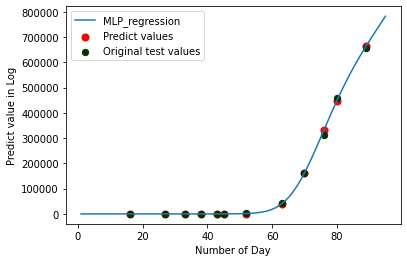

In [18]:
plt.plot(x, predicted3,label='MLP_regression')
plt.scatter(x_test_patient, 10**evaluation_3 ,s=50, c='#ff0000',label='Predict values')
plt.scatter(x_test_patient, y_test_patient,s=40, c='#003300',label='Original test values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

### conclusion


	   The Three models in exponantial case 


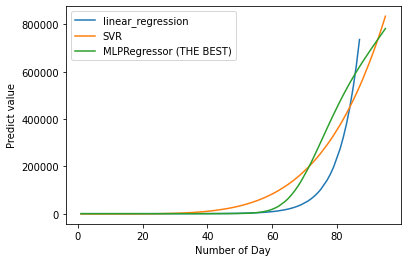

In [19]:
print("\n\t   The Three models in exponantial case ")
plt.plot(x[:76], 10**predicted1[:76],label='linear_regression')
plt.plot(x, predicted2,label='SVR')
plt.plot(x, predicted3,label='MLPRegressor (THE BEST)')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()


	   The Three models in Log case 


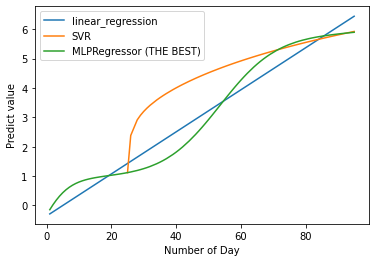

In [20]:
print("\n\t   The Three models in Log case ")
plt.plot(x, predicted1,label='linear_regression')
plt.plot(x[23:], predicted22,label='SVR')
plt.plot(x, predicted33,label='MLPRegressor (THE BEST)')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()


	   The Best model (MLP Model) 


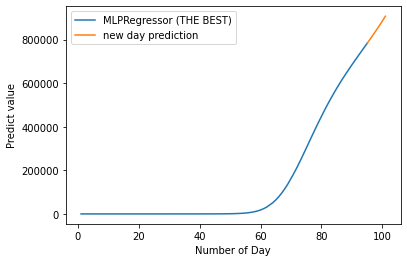

In [21]:
print("\n\t   The Best model (MLP Model) ")
plt.plot(x, predicted3,label='MLPRegressor (THE BEST)')
plt.plot(x_prediction, 10**MLP_Regressor.predict(x_prediction),label='new day prediction')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()


	 The Best model (MLP Model) in Log


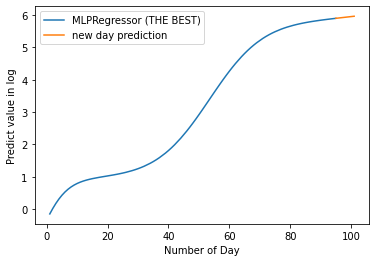

In [22]:
print("\n\t The Best model (MLP Model) in Log")
plt.plot(x, np.log10(predicted3),label='MLPRegressor (THE BEST)')
plt.plot(x_prediction, MLP_Regressor.predict(x_prediction), label='new day prediction')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in log')
plt.show()

# deaths
## preparing death's data

In [23]:
path2='C:/Users/hp/Desktop/practice projects/Corona-virus-COVID19-predictions-project-master/Corona-virus-COVID19-predictions-project-master/dataset/Deaths_us.csv'
ds_death = pd.read_csv(path2, index_col=0)
ds_death.head(10)

,num_of_date,Deaths,Date_test,num_of_date_test,Deaths_test
Date,,,,,
2020-03-02,1,6,2020-03-18,17.0,171.0
2020-03-03,2,9,2020-03-24,23.0,957.0
2020-03-04,3,11,2020-04-01,31.0,6394.0
2020-03-05,4,12,2020-04-11,41.0,23843.0
2020-03-06,5,14,2020-04-22,52.0,47894.0
2020-03-07,6,17,2020-04-28,58.0,59266.0
2020-03-08,7,21,2020-04-05,35.0,11793.0
2020-03-09,8,22,2020-04-16,46.0,34619.0
2020-03-10,9,30,NaN,NaN,NaN


In [24]:
x_death = ds_death['num_of_date']
y_death = ds_death['Deaths']
x_test_deaths = ds_death['num_of_date_test'][:8]
y_test_deaths = ds_death['Deaths_test'][:8]
x_prediction2 =[[60],[61],[62],[63],[64],[65],[67]]

## linear regression
### code and validation

In [25]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

y_log_D = np.log10(y_death)

scores = []
######################################################################################################################
Linear_Regression = LinearRegression()
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x_death):
    X_train_D, X_test_D, y_log_train_D, y_log_test_D= x_death[train_index], x_death[test_index], y_log_D[train_index], y_log_D[test_index]
    
    Linear_Regression.fit(X_train_D.values.reshape(-1,1), y_log_train_D)
    scores.append(Linear_Regression.score(X_test_D.values.reshape(-1,1), y_log_test_D))
    
print("Average score for Linear Regression:",sum(scores)/10)    


Average score for Linear Regression: 0.8742874590701346


## After the validation we evaluate the Linear Model:
### evaluation

In [26]:
Linear_Regression.fit(x_death.values.reshape(-1,1), y_log_D)
y_test_deaths_log=np.log10(y_test_deaths)
evaluation_4 =Linear_Regression.predict(x_test_deaths.values.reshape(-1,1))
score=Linear_Regression.score(x_test_deaths.values.reshape(-1,1), y_test_deaths_log)   
print("Final Evaluation Score for Linear Regression :",score)

Final Evaluation Score for Linear Regression : 0.830093599032727


### prediction for new days

In [27]:
print('Evaluation for expecting 6 days in future in Linear_Regression:')
for predict in x_prediction2:
  print('day',predict,'=',int(10**Linear_Regression.predict([predict])))

Evaluation for expecting 6 days in future in Linear_Regression:
day [60] = 314958
day [61] = 374098
day [62] = 444343
day [63] = 527777
day [64] = 626878
day [65] = 744587
day [67] = 1050462


## plot
### Here the data are displayed in logarithmic representation

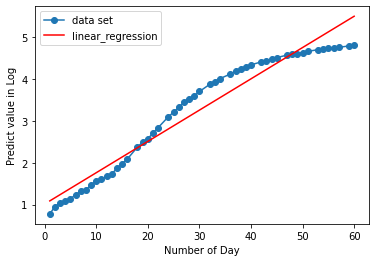

In [28]:
predicted4 =(Linear_Regression.predict(x_death.values.reshape(-1,1)))
plt.plot(x_death, y_log_D, 'o-',label='data set')
plt.plot(x_death, predicted4,c='#ff0000',label='linear_regression')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

### Here the data are displayed in logarithmic representation

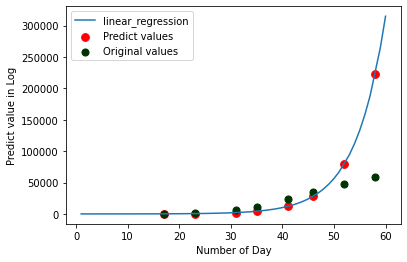

In [29]:
plt.plot(x_death[:58], 10**(predicted4[:58]),label='linear_regression')
plt.scatter(x_test_deaths, 10**evaluation_4 ,s=60, c='#ff0000',label='Predict values')
plt.scatter(x_test_deaths, y_test_deaths ,s=50, c='#003300',label='Original values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

## svr - code n validation

In [30]:
from sklearn.svm import SVR


scores_1 = []
scores_2 = []
scores_3 = []
######################################################################################################################
SVR_Regressor_1 = SVR(kernel='rbf')
SVR_Regressor_2 = SVR(kernel='poly',degree=4)
SVR_Regressor_3 = SVR(kernel='linear')
######################################################################################################################
cv = KFold(n_splits=8, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x_death):
    X_train_D, X_test_D, y_train_D, y_test_D = x_death[train_index], x_death[test_index], y_death[train_index], y_death[test_index]
    #
    SVR_Regressor_1.fit(X_train_D.values.reshape(-1,1), y_train_D)
    scores_1.append(SVR_Regressor_1.score(X_test_D.values.reshape(-1,1), y_test_D))
    #
    SVR_Regressor_2.fit(X_train_D.values.reshape(-1,1), y_train_D)
    scores_2.append(SVR_Regressor_2.score(X_test_D.values.reshape(-1,1), y_test_D))
    #
    SVR_Regressor_3.fit(X_train_D.values.reshape(-1,1), y_train_D)
    scores_3.append(SVR_Regressor_3.score(X_test_D.values.reshape(-1,1), y_test_D))

print("Average score for SVR_Regressor_1:",sum(scores_1)/8,"\nAverage score for SVR_Regressor_2:",sum(scores_2)/8,"\nAverage score for SVR_Regressor_3:",sum(scores_3)/8)    


Average score for SVR_Regressor_1: -0.5473117937312793 
Average score for SVR_Regressor_2: 0.919539558478903 
Average score for SVR_Regressor_3: 0.3446979640411154


#### After the validation we chosed best parameter for SVR (SVR_Regressor_2) to evaluate:

### evaluation

In [31]:
SVR_Regressor_2.fit(x_death.values.reshape(-1,1), y_death)
y_test_deaths_log=np.log10(y_test_deaths)
evaluation_5 =SVR_Regressor_2.predict(x_test_deaths.values.reshape(-1,1))
score=SVR_Regressor_2.score(x_test_deaths.values.reshape(-1,1), y_test_deaths)   
print("Final Evaluation Score for SVR Regression :",score)

Final Evaluation Score for SVR Regression : 0.9342479063269596


### prediction for new days

In [32]:
print('Evaluation for expecting 6 days in future in SVR_Regression:')
for predict in x_prediction2:
  print('day',predict,'=',int(SVR_Regressor_2.predict([predict])))

Evaluation for expecting 6 days in future in SVR_Regression:
day [60] = 73019
day [61] = 78009
day [62] = 83251
day [63] = 88753
day [64] = 94523
day [65] = 100570
day [67] = 113530


## plot - #### here the data is displayed in logarithmic expression

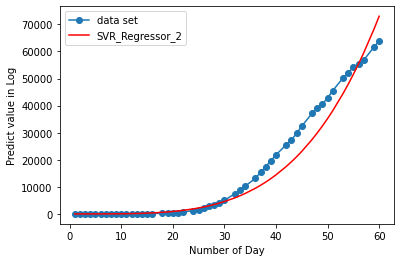

In [33]:
predicted5 = (SVR_Regressor_2.predict(x_death.values.reshape(-1,1)))
plt.plot(x_death, y_death, 'o-',label='data set')
plt.plot(x_death, predicted5,c='#ff0000',label='SVR_Regressor_2')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

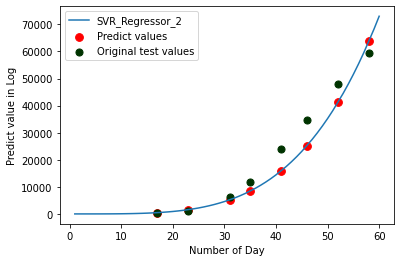

In [34]:
plt.plot(x_death, predicted5,label='SVR_Regressor_2')
plt.scatter(x_test_deaths, evaluation_5 ,s=60, c='#ff0000',label='Predict values')
plt.scatter(x_test_deaths, y_test_deaths ,s=50, c='#003300',label='Original test values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

### MLP regressor - code and validation

In [35]:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor

scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []

######################################################################################################################
MLP_Regressor_1 = MLPRegressor(hidden_layer_sizes=(4), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=93, validation_fraction=0.1)
MLP_Regressor_2 = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=93, validation_fraction=0.1)
MLP_Regressor_3 = MLPRegressor(hidden_layer_sizes=(6), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=93, validation_fraction=0.1)
MLP_Regressor_4 = MLPRegressor(hidden_layer_sizes=(4), activation='relu', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=93, validation_fraction=0.1)
MLP_Regressor_5 = MLPRegressor(hidden_layer_sizes=(4), activation='tanh', solver='sgd' ,learning_rate_init=0.01, max_iter=1000,random_state=93, validation_fraction=0.1)
######################################################################################################################
cv = KFold(n_splits=8, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x_death):
    X_train_D, X_test_D, y_log_train_D, y_log_test_D = x_death[train_index], x_death[test_index], y_log_D[train_index], y_log_D[test_index]
    #
    MLP_Regressor_1.fit(X_train_D.values.reshape(-1,1), y_log_train_D)
    scores_1.append(MLP_Regressor_1.score(X_test_D.values.reshape(-1,1), y_log_test_D))
    #
    MLP_Regressor_2.fit(X_train_D.values.reshape(-1,1), y_log_train_D)
    scores_2.append(MLP_Regressor_2.score(X_test_D.values.reshape(-1,1), y_log_test_D))
    #
    MLP_Regressor_3.fit(X_train_D.values.reshape(-1,1), y_log_train_D)
    scores_3.append(MLP_Regressor_3.score(X_test_D.values.reshape(-1,1), y_log_test_D))
    #
    MLP_Regressor_4.fit(X_train_D.values.reshape(-1,1), y_log_train_D)
    scores_4.append(MLP_Regressor_4.score(X_test_D.values.reshape(-1,1), y_log_test_D))
    #
    MLP_Regressor_5.fit(X_train_D.values.reshape(-1,1), y_log_train_D)
    scores_5.append(MLP_Regressor_5.score(X_test_D.values.reshape(-1,1), y_log_test_D))

print(  "Average score for MLP_Regressor_1:",sum(scores_1)/8,
      "\nAverage score for MLP_Regressor_2:",sum(scores_2)/8,
      "\nAverage score for MLP_Regressor_3:",sum(scores_3)/8,
      "\nAverage score for MLP_Regressor_4:",sum(scores_4)/8,
      "\nAverage score for MLP_Regressor_5:",sum(scores_5)/8)    

Average score for MLP_Regressor_1: 0.9993752908096012 
Average score for MLP_Regressor_2: 0.9996849733975617 
Average score for MLP_Regressor_3: 0.9995097441727419 
Average score for MLP_Regressor_4: 0.9705191033723465 
Average score for MLP_Regressor_5: -0.4147717669156994


### After the validation we chosed best parameter for MLP (MLP_Regressor_2) to evaluate:

### evaluation

In [36]:
MLP_Regressor_D = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01,
                               max_iter=1000,random_state=93, validation_fraction=0.1)
MLP_Regressor_D.fit(x_death.values.reshape(-1,1), y_log_D)
y_test_deaths_log=np.log10(y_test_deaths)
evaluation_6 =MLP_Regressor_D.predict(x_test_deaths.values.reshape(-1,1))
score=MLP_Regressor_D.score(x_test_deaths.values.reshape(-1,1), y_test_deaths_log)   
print("Final Evaluation Score for MLP Regression :",score)

Final Evaluation Score for MLP Regression : 0.9998610067292538


## prediction for new days

In [37]:
print('Evaluation for expecting 6 days in future in MLP_Regression:')
for predict in x_prediction2:
  print('day',predict,'=',int(10**MLP_Regressor_D.predict([predict])))

Evaluation for expecting 6 days in future in MLP_Regression:
day [60] = 63647
day [61] = 65528
day [62] = 67370
day [63] = 69172
day [64] = 70931
day [65] = 72645
day [67] = 75935


### plot - here data is display in log representation

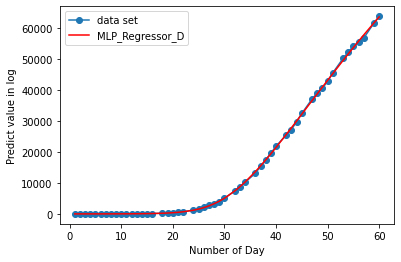

In [38]:
predicted6 = MLP_Regressor_D.predict(x_death.values.reshape(-1,1))
plt.plot(x_death, y_death, 'o-',label='data set')
plt.plot(x_death, 10**predicted6,c='#ff0000',label='MLP_Regressor_D')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in log')
plt.show()

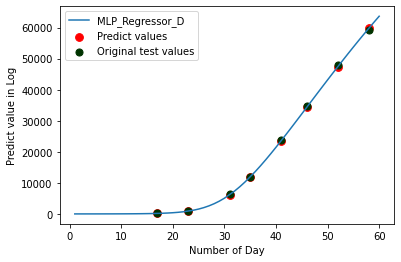

In [39]:
plt.plot(x_death, 10**predicted6,label='MLP_Regressor_D')
plt.scatter(x_test_deaths, 10**evaluation_6 ,s=60, c='#ff0000',label='Predict values')
plt.scatter(x_test_deaths, y_test_deaths ,s=50, c='#003300',label='Original test values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

## conclusion


	   The Three models in exponantial case 


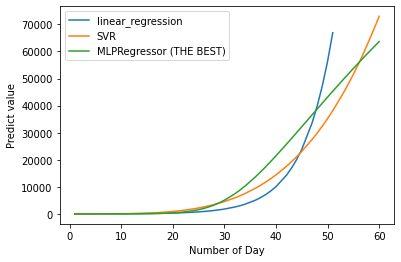

In [40]:
print("\n\t   The Three models in exponantial case ")
plt.plot(x_death[:45], 10**predicted4[:45],label='linear_regression')
plt.plot(x_death, predicted5,label='SVR')
plt.plot(x_death, 10**predicted6,label='MLPRegressor (THE BEST)')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()



	   The Three models in Log case 


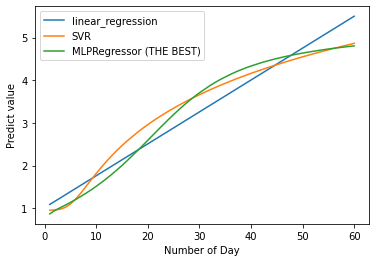

In [41]:
print("\n\t   The Three models in Log case ")
plt.plot(x_death, predicted4,label='linear_regression')
plt.plot(x_death, np.log10(predicted5),label='SVR')
plt.plot(x_death, predicted6,label='MLPRegressor (THE BEST)')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()


	   The Best model (MLP Model) in exponantial case 


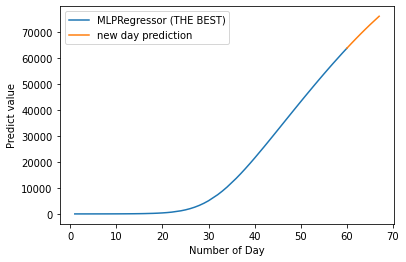

In [42]:
print("\n\t   The Best model (MLP Model) in exponantial case ")
plt.plot(x_death, 10**predicted6,label='MLPRegressor (THE BEST)')
plt.plot(x_prediction2, 10**MLP_Regressor_D.predict(x_prediction2),label='new day prediction ')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()


	 The Best model (MLP Model) in Log


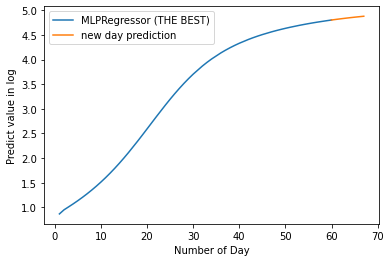

In [43]:
print("\n\t The Best model (MLP Model) in Log")
plt.plot(x_death, predicted6,label='MLPRegressor (THE BEST)')
plt.plot(x_prediction2, MLP_Regressor_D.predict(x_prediction2), label='new day prediction')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in log')
plt.show()